In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Simple Linear Equation

In [ ]:
a = np.arange(1000)
b = a*2
x = pd.DataFrame(a)
y = pd.DataFrame(b)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)
lr = LinearRegression()
run = lr.fit(xtrain, ytrain)

In [ ]:
linear_predict = lr.predict(xtest)

In [ ]:
linear_predict[:5], ytest[:5]

(array([[1042.],
        [1474.],
        [1480.],
        [1320.],
        [ 822.]]),
         0
 521  1042
 737  1474
 740  1480
 660  1320
 411   822)

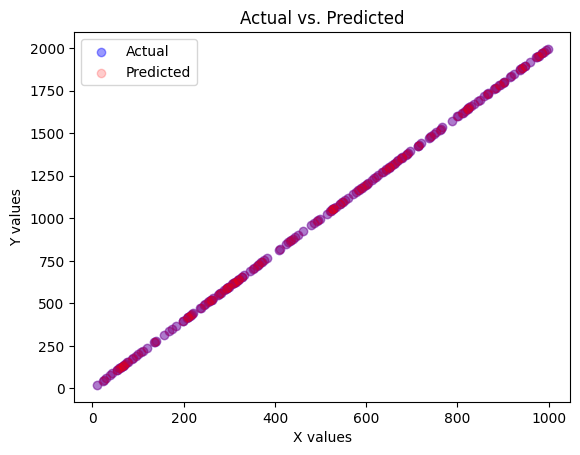

In [ ]:
plt.scatter(xtest,ytest, color='blue',label='Actual',alpha=0.4)
plt.scatter(xtest,linear_predict, color='red', label='Predicted',alpha=0.2)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

Complex Non Linear Equation

In [ ]:
import tensorflow as tf

In [ ]:
a = np.arange(1000)
b = 3.2*a*a*a + 0.89*a*a + 2.3*a + 4.9
x = pd.DataFrame(a)
y = pd.DataFrame(b)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)
lr = LinearRegression()
run = lr.fit(xtrain, ytrain)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=(1,), activation = 'relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])
adam = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=adam, loss=tf.keras.losses.Huber())
run = model.fit(xtrain, ytrain, epochs=500, verbose=1, validation_data=(xtest,ytest))
train_loss = run.history['loss']
val_loss = run.history['val_loss']

Epoch 1/500
25/25 [==============================] - 1s 8ms/step - loss: 793717056.0000 - val_loss: 818615360.0000
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 793682688.0000 - val_loss: 818487552.0000
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 793068352.0000 - val_loss: 816677184.0000
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 787286080.0000 - val_loss: 802882752.0000
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 754317824.0000 - val_loss: 735937088.0000
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 633882880.0000 - val_loss: 553162048.0000
Epoch 7/500
25/25 [==============================] - 0s 4ms/step - loss: 436798432.0000 - val_loss: 413547808.0000
Epoch 8/500
25/25 [==============================] - 0s 3ms/step - loss: 399645856.0000 - val_loss: 413114272.0000
Epoch 9/500
25/25 [==============================] - 0s 3ms/step - loss: 3982253

<function matplotlib.pyplot.show(close=None, block=None)>

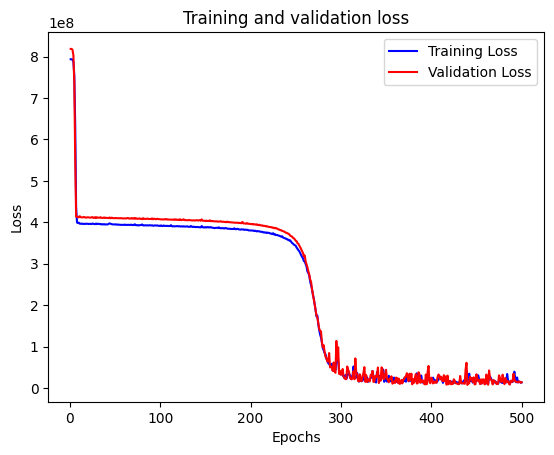

In [ ]:
epochs = range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

In [ ]:
nn_predict = model.predict(xtest)

7/7 [==============================] - 0s 1ms/step


In [ ]:
nn_predict[:5], ytest[:5]

(array([[4.4207542e+08],
        [1.2847873e+09],
        [1.3019679e+09],
        [9.2841146e+08],
        [2.2139338e+08]], dtype=float32),
                 0
 521  4.527892e+08
 737  1.281495e+09
 740  1.297206e+09
 660  9.203764e+08
 411  2.223162e+08)

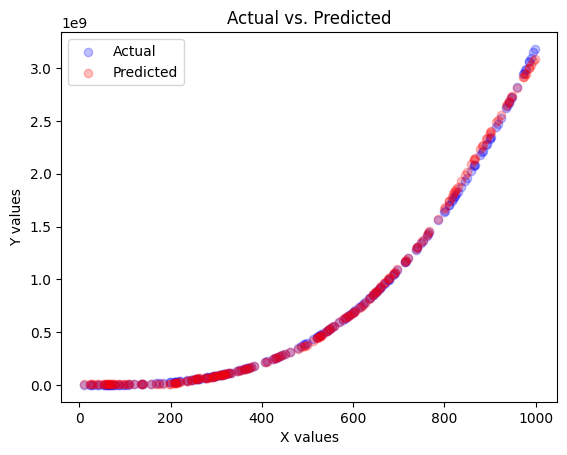

In [ ]:
plt.scatter(xtest,ytest, color='blue',label='Actual',alpha=0.25)
plt.scatter(xtest,nn_predict, color='red', label='Predicted',alpha=0.25)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()